<a href="https://colab.research.google.com/github/yretrut/IIS/blob/main/3lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторная работа 3**

Визуализация данных в Google Colaboratory

Анализ, обработка и визуализация данных

Matplotlib - наиболее распространенный пакет для построения графиков.

MPL очень большая библиотека, но по своей сути она состоит из небольшого количества базовых компонентов:

Figure - это контейнер самого верхнего уровня, та область на которой все нарисовано. Таких областей может быть несколько, каждая из которых может содержать несколько контейнеров Axes.
Axes - это та область на которой чаще всего и отражаются графики (данные в виде графиков), а так же все вспомогательные атрибуты (линии сетки, метки, указатели и т.д.). Часто, установка этой области сопровождается с вызовом subplot, который и помещает Axes на регулярную сетку. Поэтому, так же часто Axes и Subplot можно считать синонимами. 

Каждая область Axes содержит XAxis и YAxis. Они содержат, деления, метки и прочие вспомогательные атрибуты. 

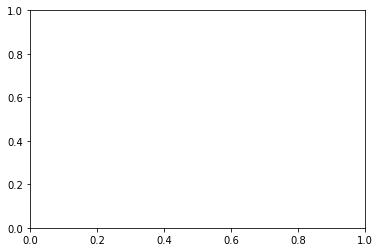

In [1]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

plt.show()

В строке fig = plt.figure() мы создали область Figure (экземпляр класса figure). В строке ax = fig.add_subplot(111) мы добавили к Figure область Axes. Вообще, было бы правильнее использовать fig.add_axes, но в данном случае fig.add_subplot(111) намного удобнее, в конце концов subplot просто размещает Axes на сетке Figure. Обратите внимание на параметр, который мы передаем 111 — это первая строка, первый столбец и первая (единственная) ячейка на сетке Figure.

В том что Figure и Axes это разные области можно легко убедиться если изменить их цвет:

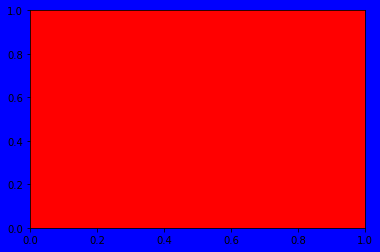

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111)

fig.set(facecolor = 'blue')
ax.set(facecolor = 'red')

plt.show()

Кстати, Axes должна принадлежать только одной области Figure. Как правило, всегда сначала создается область Figure, а затем с помощью add_subplot() в Figure размещается одна или несколько областей Axes.

Именно Axes вам придется видоизменять чаще всего, поэтому давайте установим побольше параметров для данной области:

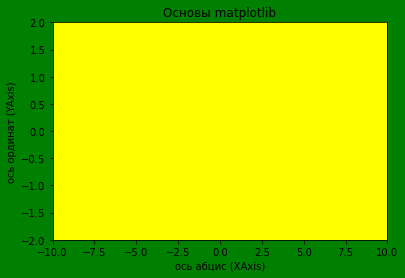

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)

fig.set(facecolor = 'green')
ax.set(facecolor = 'yellow',
       xlim = [-10, 10],
       ylim = [-2, 2],
       title = 'Основы matplotlib',
       xlabel = 'ось абцис (XAxis)',
       ylabel = 'ось ординат (YAxis)')

plt.show()


Метод set есть практически у всех объектов matplotlib.

 Например, нам вдруг захотелось изменить цвет и размер title. Для этого существуют так же два способа:

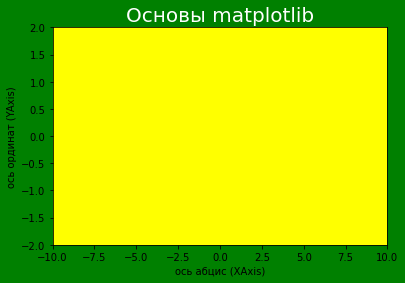

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)

fig.set(facecolor = 'green')
ax.set(facecolor = 'yellow',
       xlim = [-10, 10],
       ylim = [-2, 2],
       xlabel = 'ось абцис (XAxis)',
       ylabel = 'ось ординат (YAxis)')

#  Способ №1:
ax.set_title('Основы matplotlib', color = 'white', size = 20)

#  Способ №2:
ax.set_title('Основы matplotlib')
ax.title.set_color('white')
ax.title.set_size(20)

plt.show()

Большинство графиков: линий, гистограмм, круговых диаграмм т.е. отображений данных происходит на Axes. Поэтому для рисования на Axes необходимо использовать какой-нибудь из его методов. К слову сказать, этих методов множество, но мы сосредоточимся всего на двух: plot и scatter.

  •	plot рисует точки, соединенные линиями;

  •	scatter просто рисует точки
  
Давайте построим простой график, на котором будет присутствовать отображение одних данных точками, а других линиями:


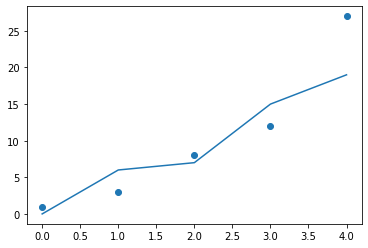

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([0, 1, 2, 3, 4], [0, 6, 7, 15, 19])
ax.scatter([0, 1, 2, 3, 4], [1, 3, 8, 12, 27])

plt.show()

Нарисованные данные так же поддерживают самые разные параметры внешнего вида:

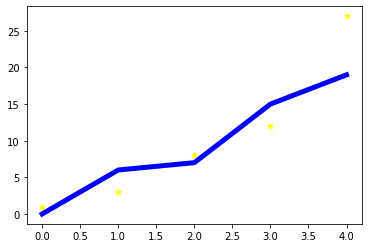

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([0, 1, 2, 3, 4], [0, 6, 7, 15, 19], color = 'blue', linewidth = 5)
ax.scatter([0, 1, 2, 3, 4], [1, 3, 8, 12, 27], color = 'yellow', marker = '*')

plt.show()

Очень часто, нам необходимо размещать несколько графиков рядом друг с другом. Это проще всего сделать используя plt.subplots().

 Но давайте для начала разберем следующий пример:

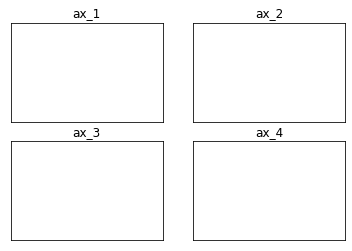

In [8]:
fig = plt.figure()

ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)
ax_3 = fig.add_subplot(2, 2, 3)
ax_4 = fig.add_subplot(2, 2, 4)

ax_1.set(title = 'ax_1', xticks=[], yticks=[])
ax_2.set(title = 'ax_2', xticks=[], yticks=[])
ax_3.set(title = 'ax_3', xticks=[], yticks=[])
ax_4.set(title = 'ax_4', xticks=[], yticks=[])

plt.show()


В этом примере, так же как и раньше, мы сначала создали область Figure, а затем с помощью команды fig.add_subplot() начали добавлять, одну за другой область Axes (ax_1, ax_2, ax_3, ax_4). Причем заметьте, каждая область Axes является независимой от других, то есть на них могут быть нарисованы самые разные графики и установлены самые разные параметры внешнего вида.

ЛИНЕЙНЫЕ ГРАФИКИ

Метод построения линии очень прост:

- есть массив абсцис (x);

- есть массив ординат (y);

- элементы с одинаковым индексом в этих массивах — это координаты точек на плоскости;

- последовательные точки соединяются линией.

Под массивами, подразумеваются списки, кортежи или массивы NumPy. Кстати, последние предоставляют гораздо больше удобств чем списки и кортежи, поэтому знание пакета NumPy может значительно упростить вам жизнь.

Давайте выполним следующий код:


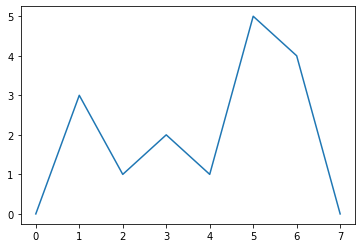

In [9]:
import matplotlib.pyplot as plt
plt.plot((0, 1, 2, 3, 4, 5, 6, 7), (0, 3, 1, 2, 1, 5, 4, 0))
plt.show()

Метод plt.plot(), в простейшем случае, принимает один аргумент - последовательность чисел, которая соответствует оси ординат (y), ось абсцис (x) строится автоматически от 0 до n, где n - это длинна массива ординат. Следующий код построит точно такой же график:

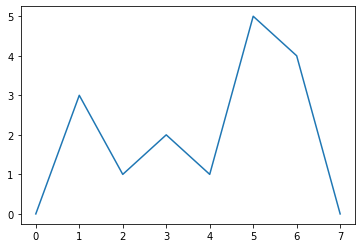

In [10]:
import matplotlib.pyplot as plt
plt.plot((0, 3, 1, 2, 1, 5, 4, 0))
plt.show()


Такой способ может оказаться полезным, если диапазон чисел на оси абцис для вас не важен. Однако, если диапазон или шаг все-таки важны, то их все же необходимо указать:

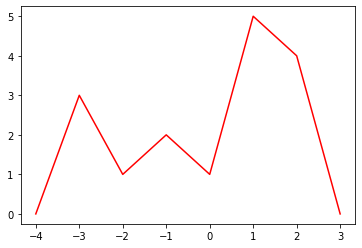

In [11]:
import matplotlib.pyplot as plt
plt.plot((-4, -3, -2, -1, 0, 1, 2, 3), (0, 3, 1, 2, 1, 5, 4, 0),color='r')
plt.show()


Еще один интересный момент - числа в массиве абсцисс не обязательно должны быть последовательными, т.е. могут быть абсолютно произвольными, а соединяться линией будут так же только последовательные точки. Например:

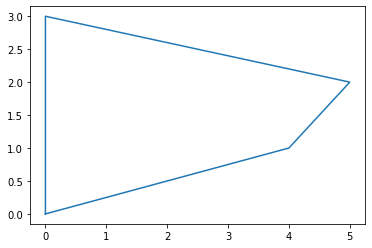

In [12]:
plt.plot((0, 0, 5, 4, 0), (0, 3, 2, 1, 0))
plt.show()

Каждый раз добавлять строку import matplotlib.pyplot as plt не нужно.

Удобно использовать эту особенность, когда вам необходимо строить плоские, замкнутые кривые или геометрические фигуры:

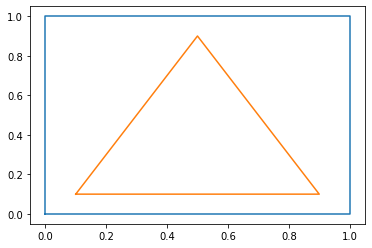

In [13]:
plt.plot((0, 0, 1, 1, 0), (0, 1, 1, 0, 0))
plt.plot((0.1, 0.5, 0.9, 0.1), (0.1, 0.9, 0.1, 0.1))
plt.show()

Как вы заметили мы два раза использовали метод plt.plot(), передавая разные данные. С определенной погрешностью можно сказать, что метод plt.plot() и занимается прорисовкой наших линий, а plt.show() отображением самого графика.

Рассмотрим более сложный пример.

Пример 1:

Добавим текст «Линейный график», кодовую ячейку с кодом:


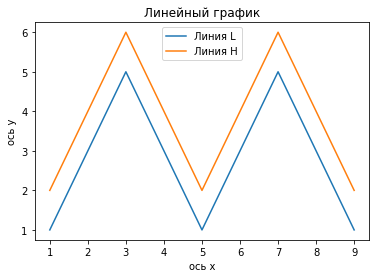

In [14]:
x  = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y1 = [1, 3, 5, 3, 1, 3, 5, 3, 1]
y2 = [2, 4, 6, 4, 2, 4, 6, 4, 2]
plt.plot(x, y1, label="Линия L")
plt.plot(x, y2, label="Линия H")
plt.plot()

plt.xlabel("ось x")
plt.ylabel("ось y")
plt.title("Линейный график")
plt.legend()
plt.show()

Пример 2:

Построить график sin(x) и cos(x).

Добавим библиотеку Numpy.


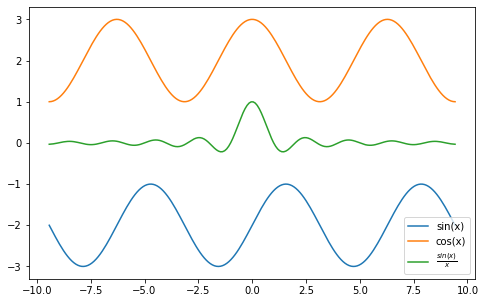

In [15]:
import numpy as np

x = np.linspace(-3*np.pi, 3*np.pi, 200)
y1 = np.sin(x) - 2
y2 = np.cos(x) + 2
y3 = np.sinc(x)

fig, ax = plt.subplots()

ax.plot(x, y1, label = 'sin(x)')
ax.plot(x, y2, label = 'cos(x)')
ax.plot(x, y3, label = r'$\frac{sin(x)}{x}$')

ax.legend()

fig.set_figheight(5)
fig.set_figwidth(8)
plt.show()

Строки fig.set_figheight(5) и fig.set_figwidth(8) устанавливают высоту и ширину фигуры.

Пример 3:

Отрисуем различные положения легенды на графиках.

Легенда сделала график более информативным, хотя сама нуждается в некоторых улучшениях. Но сначала разберемся как она вообще у нас появилась. Во первых, мы добавили параметр label в каждом методе plot() - этот параметр содержит текст отображаемый в легенде. Во-вторых, мы добавили еще один метод legend, который, собственно, и помещает легенду на область Axes.

Позиционирование легенды можно установить с помощью параметра loc. по умолчанию этот параметр установлен в значение 'best', что соответствует наилучшему расположению, но это не всегда так. Иногда, положение необходимо установить вручную, для чего имеется еще 10 дополнительных параметров:


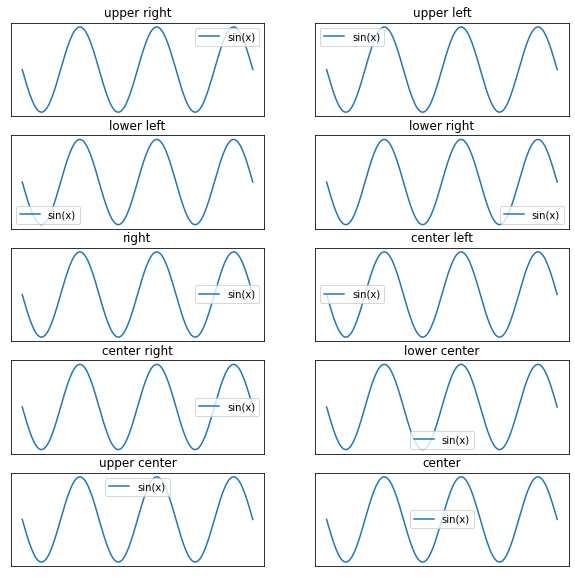

In [16]:
x = np.linspace(-3*np.pi, 3*np.pi, 200)
y1 = np.sin(x)
fig, axes = plt.subplots(5, 2)

location = ['upper right', 'upper left', 'lower left',
            'lower right', 'right', 'center left', 
            'center right', 'lower center', 'upper center', 'center']
i = 0

for ax in axes.ravel():
    ax.plot(x, y1, label = 'sin(x)')
    ax.legend(loc = location[i])
    ax.set_title(location[i])
    ax.set_xticks([])
    ax.set_yticks([])
    i += 1

fig.set_figheight(10)
fig.set_figwidth(10)
plt.show()

Параметр shadow устанавливает тень легенды и убирает ее прозрачность, а fontsize устанавливает размер шрифта:

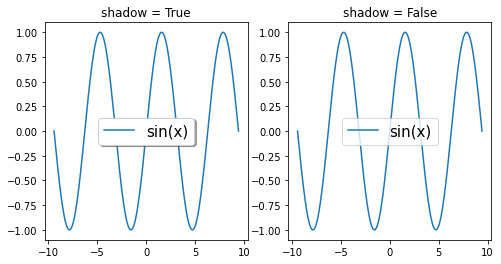

In [17]:
x = np.linspace(-3*np.pi, 3*np.pi, 200)
y = np.sin(x)

fig, axes = plt.subplots(1, 2)

axes[0].plot(x, y, label = 'sin(x)')
axes[0].legend(shadow = True,
               fontsize = 15)
axes[0].set_title('shadow = True')

axes[1].plot(x, y, label = 'sin(x)')
axes[1].legend(shadow = False,
               fontsize = 15)
axes[1].set_title('shadow = False')

fig.set_figwidth(8)
fig.set_figheight(4)
plt.show()

Цвет линии можно указать с помощью параметра color. Само значение цвета может быть из самых разных цветовых моделей:

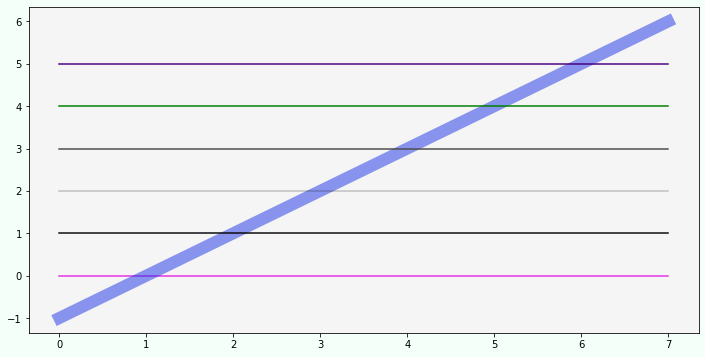

In [18]:
x = np.zeros(8)

fig, ax = plt.subplots()

# RGB:
ax.plot(x, color = (0.9, 0.2, 0.9))

# RGBA:
ax.plot(np.arange(-1, 7),
        color = (0.1, 0.2, 0.9, 0.5),
        linewidth = 12)

# hex RGB:
ax.plot(x + 1, color = '#0a0b0c')

# hex RGBA:
ax.plot(x + 2, color = '#0a0b0c3a')

# уровень серого в интервале [0, 1]:
ax.plot(x + 3, color = '0.3')

# ключ цвета из {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}:
ax.plot(x + 4, color = 'g')

# название цвета из X11/CSS4:
ax.plot(x + 5, color = 'indigo')

fig.set_figwidth(12)
fig.set_figheight(6)
fig.set_facecolor('mintcream')
ax.set_facecolor('whitesmoke')

plt.show()

Ширина линии задается с помощью параметра linewidth. Этот параметр часто применяется при изменении начертания линии:

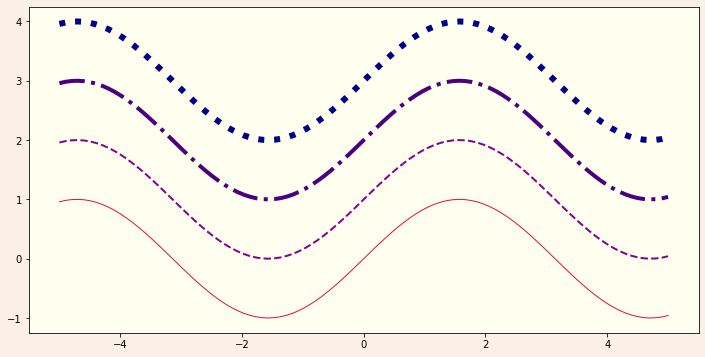

In [19]:
x = np.linspace(-5, 5, 100)
y = np.sin(x)

fig, ax = plt.subplots()

#  Сплошная линия ('-' или 'solid',
#  установлен по умолчанию):
ax.plot(x, y,
        linestyle = '-',
        linewidth = 1,
        color = 'crimson')

# Пунктирная линия ('--' или 'dashed'):
ax.plot(x, y + 1,
        linestyle = '--',
        linewidth = 2,
        color = 'darkmagenta')

# Точка-тире ('-.' или 'dashdot'):
ax.plot(x, y + 2,
        linestyle = '-.',
        linewidth = 4,
        color = 'indigo')

# Точка-точка (':' или 'dotted'):
ax.plot(x, y + 3,
        linestyle = ':',
        linewidth = 6,
        color = 'darkblue')

fig.set_figwidth(12)
fig.set_figheight(6)
fig.set_facecolor('linen')
ax.set_facecolor('ivory')

plt.show()

Улучшить восприятие линии можно так же с помощью маркеров:

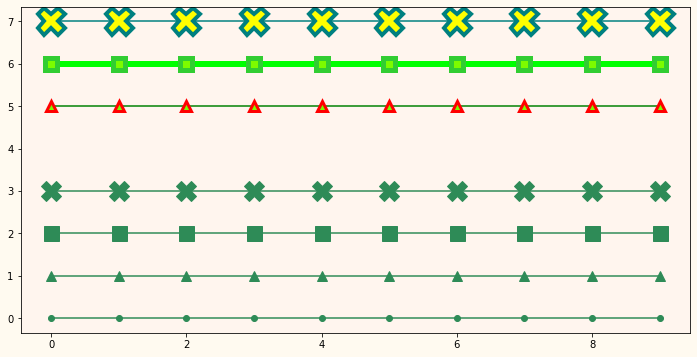

In [22]:
x = np.zeros(10)

fig, ax = plt.subplots()

#  Вид (marker)и размер маркера (markersize):
ax.plot(x,
        marker = 'o',
        color = 'seagreen')
ax.plot(x + 1,
        marker = '^',
        markersize = 10,
        color = 'seagreen')
ax.plot(x + 2,
        marker = 's',
        markersize = 15,
        color = 'seagreen')
ax.plot(x + 3,
        marker = 'X',
        markersize = 20,
        color = 'seagreen')

#  Цвет маркера (markerfacecolor),
#  его края (markeredgecolor) и
#  толщина его края (markeredgewidth):
ax.plot(x + 5,
        marker = '^',
        markersize = 10,
        color = 'green',
        markerfacecolor = 'lawngreen',
        markeredgecolor = 'red',
        markeredgewidth = 3)
ax.plot(x + 6,
        marker = 's',
        markersize = 12,
        color = 'lime',
        linewidth = 6,
        markerfacecolor = 'lawngreen',
        markeredgecolor = 'limegreen',
        markeredgewidth = 5)
ax.plot(x + 7,
        marker = 'X',
        markersize = 27,
        color = 'teal',
        markerfacecolor = 'yellow',
        markeredgecolor = 'teal',
        markeredgewidth = 4)

fig.set_figwidth(12)
fig.set_figheight(6)
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()


Если необходимо сфокусировать внимание на определенном участке графика - то это проще всего сделать с помощью стрелок:

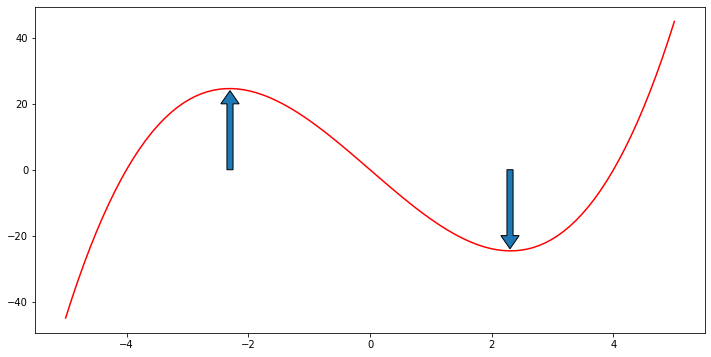

In [23]:
x = np.linspace(-5, 5, 100)
y = x*(x - 4)*(x + 4)


fig, ax = plt.subplots()

ax.plot(x, y,color='r')
ax.arrow(-2.3, 0, 0, 20,
         width = 0.1,
         head_length = 4)
ax.arrow(2.3, 0, 0, -20,
         width = 0.1,
         head_length = 4)

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"

plt.show()

Длина стрелки не включает в себя длину острия. Изменить такое поведение можно с помощью параметра length_includes_head установленным в True:

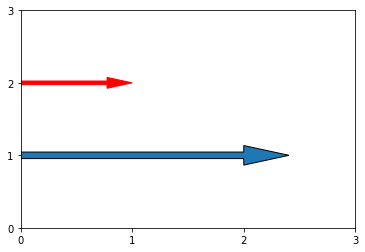

In [24]:
fig, ax = plt.subplots()

ax.arrow(0, 1, 2, 0,
         width = 0.09)

#  Длина стрелки будет включать в себя длину острия:
ax.arrow(0, 2, 1, 0,
         length_includes_head = True,
         width = 0.05, color='r')

#  Установим диапазон значений:
ax.set_xticks([0, 1, 2, 3])
ax.set_yticks([0, 1, 2, 3])

plt.show()

Ширина острия стрелки по умолчанию равно трем значениям ширины ее основной линии. С помощью параметра head_width можно установить произвольное значение ширины острия:

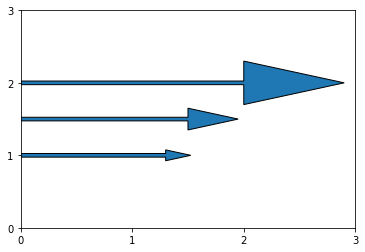

In [25]:
fig, ax = plt.subplots()

ax.arrow(0, 1, 1.3, 0,
         width = 0.05)

#  head_width - ширина острия стрелки:
ax.arrow(0, 1.5, 1.5, 0,
         head_width = 0.3,
         width = 0.05)
ax.arrow(0, 2, 2, 0,
         head_width = 0.6,
         width = 0.05)

#  Установим диапазон значений:
ax.set_xticks([0, 1, 2, 3])
ax.set_yticks([0, 1, 2, 3])

plt.show()

Цвет стрелки и ее края также настраиваются:

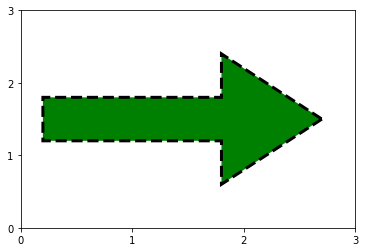

In [26]:
fig, ax = plt.subplots()

ax.arrow(0.2, 1.5, 2.5, 0,
         facecolor = 'green',    #  цвет стрелки
         edgecolor = 'black',  #  цвет края
         linewidth = 3,        #  ширина линии края
         linestyle = '--',     #  начертание линии
         width = 0.6,
         head_length = 0.9,
         length_includes_head = True)


#  Установим диапазон значений:
ax.set_xticks([0, 1, 2, 3])
ax.set_yticks([0, 1, 2, 3])

plt.show()

QUIVER - ПОЛЕ ВЕКТОРОВ

В самом простом случае, метод quiver принимает всего два аргумента - значениями которых являются два двумерных массива одинакового размера:

•	U - массив длин стрелок по оси x;

•	V - массив длин стрелок по оси y.

Посмотрите на три следующих примера, и вы сразу поймете, как строятся стрелки:


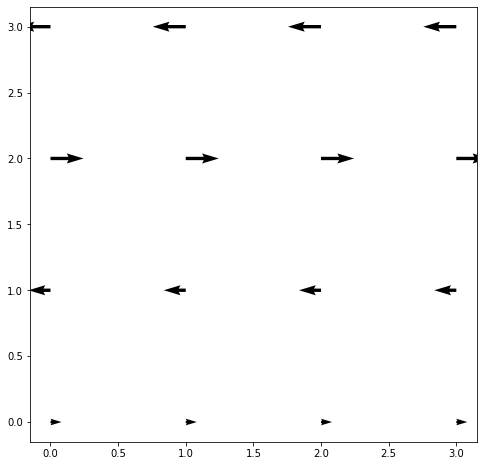

In [27]:
U = [[1, 1, 1, 1], [-2, -2, -2, -2],
     [3, 3, 3, 3], [-3, -3, -3, -3]]

V = [[0, 0, 0, 0], [0, 0, 0, 0],
     [0, 0, 0, 0], [0, 0, 0, 0]]

fig, ax = plt.subplots()

ax.quiver(U, V)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()

Параметр C позволяет с помощью массива определить цвет каждой стрелки:

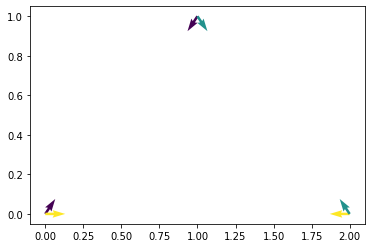

In [28]:
X = [0, 0, 1, 1, 2, 2]
Y = [0, 0, 1, 1, 0, 0]

U = [2, 4, -2, 2, -4, -2]
V = [3, 0, -3, -3, 0, 3]

C = [0, 2, 0, 1, 2, 1]

fig, ax = plt.subplots()

ax.quiver(X, Y, U, V, C)

plt.show()

Стрелки могут быть как одноцветными, так и разноцветными, причем цвет стрелок, так же как их длина и направление, может отражать некоторую закономерность:

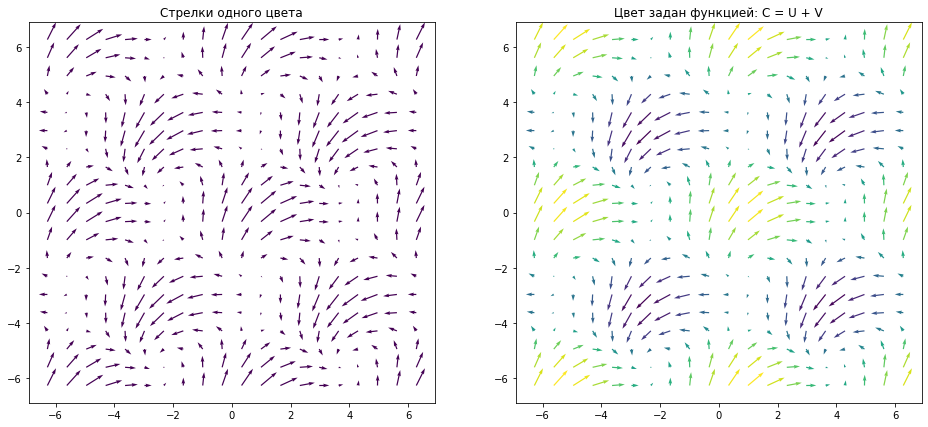

In [29]:
X, Y = np.mgrid[-2*np.pi:2*np.pi:20j,
                -2*np.pi:2*np.pi:20j]

U = np.sin(X) + np.cos(Y)
V = np.cos(X) + np.cos(Y)

fig, axes = plt.subplots(1, 2)

C = np.full_like(X, 5)
axes[0].quiver(X, Y, U, V, C)
axes[0].set_title('Стрелки одного цвета')

C = U + V
axes[1].quiver(X, Y, U, V, C)
axes[1].set_title('Цвет задан функцией: C = U + V')

fig.set_figwidth(16)    #  ширина и
fig.set_figheight(7)    #  высота "Figure"

plt.show()

ГИСТОГРАММЫ

Гистограмма — это множество прямоугольников, площадь которых (или высота) пропорциональна какой-нибудь величине. 

Например, осадки в Ростове-на-Дону за три осенних месяца: в сентябре 20 мм, в октябре - 15мм, в ноябре - 26 мм.


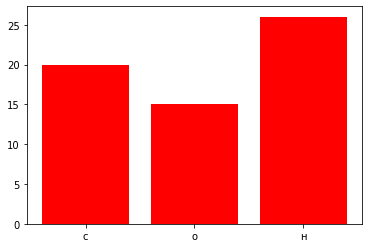

In [30]:
plt.bar(['с', 'о', 'н'], [20, 15, 26],color='r')
plt.show()

Гистограммы могут отображать несколько наборов данных, что очень удобно для их сравнения:

В 2019г. осадки в Ростове-на-Дону за три осенних месяца: в сентябре 20 мм, в октябре - 15мм, в ноябре - 26 мм, в 2020 в сентябре 10 мм, в октябре - 13мм, в ноябре - 30 мм.


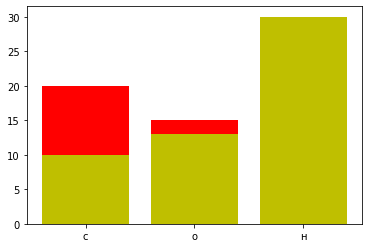

In [31]:
plt.bar(['с', 'о', 'н'], [20, 15, 26],color='r')
plt.bar(['с', 'о', 'н'], [10, 13, 30],color='y')
plt.show()

Построим гистограмму осадков за летние месяцы за 2010 и 2020:

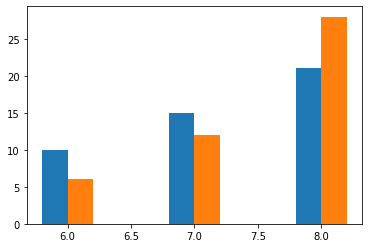

In [32]:
plt.bar([5.9, 6.9, 7.9], [10, 15, 21], width = 0.2)
plt.bar([6.1, 7.1, 8.1], [6, 12, 28], width = 0.2)
plt.show()

Если вам необходимо наглядно отобразить соотношение частей целого, то лучше воспользоваться круговой диаграммой. Например, в компании работают 100 человек из них 40 женщин и 60 мужчин:

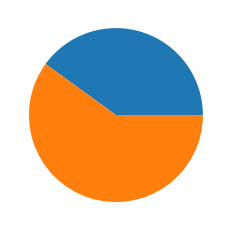

In [33]:
plt.pie([40, 60])
plt.show()

Например, отобразим количество учеников по классам в школе.

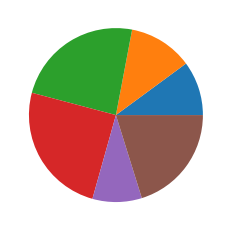

In [34]:
plt.pie([11, 13, 26, 27, 10, 22])
plt.show()

PCOLORMESH - ПСЕВДОЦВЕТНАЯ СЕТКА

В самом простом случае метод pcolormesh принимает всего один аргумент - двумерный массив чисел, которые обозначают цвета ячейки сетки:


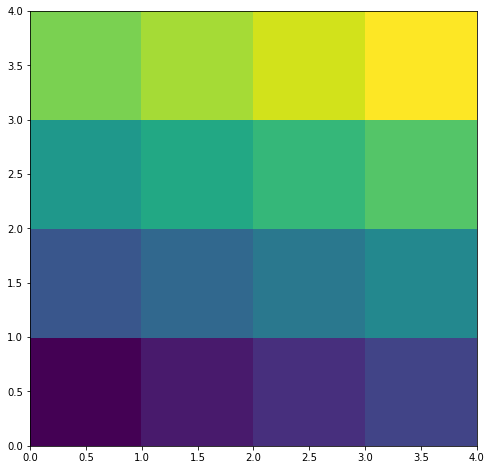

In [35]:
c = [[ 0, 1, 2, 3],
     [ 4, 5, 6, 7],
     [ 8, 9, 10, 11],
     [12, 13, 14, 15]]

fig, ax = plt.subplots()

ax.pcolormesh(c)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()

Мы можем легко задавать размеры ячеек, добавив массив х и у. Как это работает легче всего разобрать на графике с небольшим количеством ячеек:

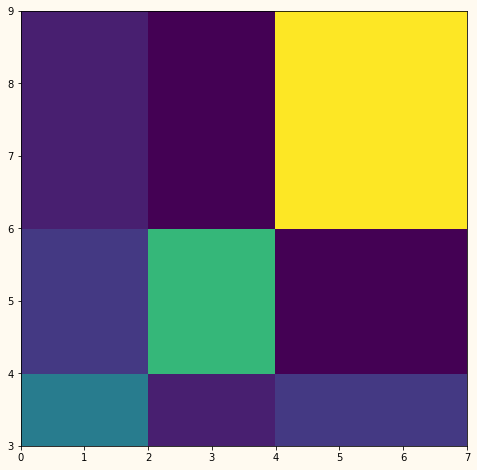

In [36]:
c = [[5, 1, 2],
     [2, 8, 0],
     [1, 0, 12]]

x = [0, 2, 4, 7]
y = [3, 4, 6, 9]

fig, ax = plt.subplots()

ax.pcolormesh(x, y, c)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

Самостоятельная работа:

1. Создать фигуру, заданную кодом, разобрать по строкам код:


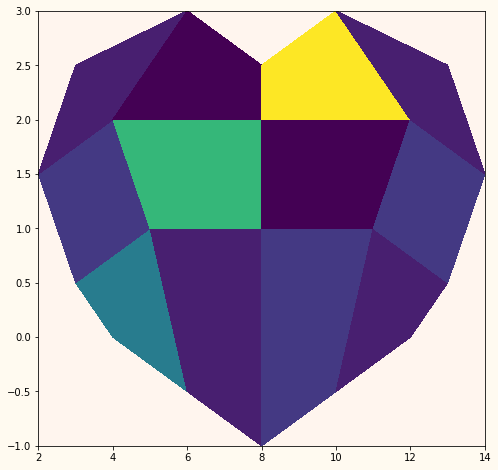

In [37]:
# Координаты точек
c = [[5, 1, 2, 1],
     [2, 8, 0, 2],
     [1, 0, 12, 1]]

x = [[4, 6, 8, 10, 12],
     [3, 5, 8, 11, 13],
     [2, 4, 8, 12, 14],
     [3, 6, 8, 10, 13]]

y = [[0,-0.5,-1,-0.5,0],
     [0.5,1,1,1,0.5],
     [1.5,2,2,2,1.5],
     [2.5,3,2.5,3,2.5]]

fig, ax = plt.subplots()

# Сетка цветов
ax.pcolormesh(x, y, c)

fig.set_figwidth(8)    #  ширина 
fig.set_figheight(8)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

2. Создать фигуру, заданную кодом, разобрать по строкам код:

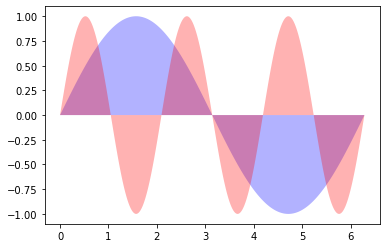

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Возвращает одномерный массив из указанного количества элементов
x = np.linspace(0, 2 * np.pi, 500)
y1 = np.sin(x)
y2 = np.sin(3 * x)

fig, ax = plt.subplots()
# Заполнение
ax.fill(x, y1, 'b', x, y2, 'r', alpha=0.3)
plt.show()